In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
print("There are", len(data), "observations and", len(data.columns), "variables in the dataset.")

There are 2240 observations and 29 variables in the dataset.


In [4]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

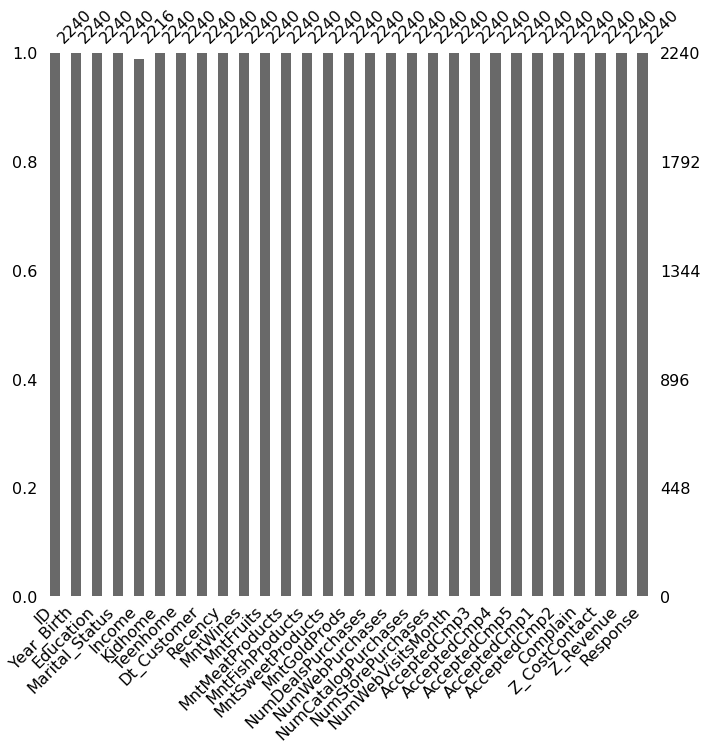

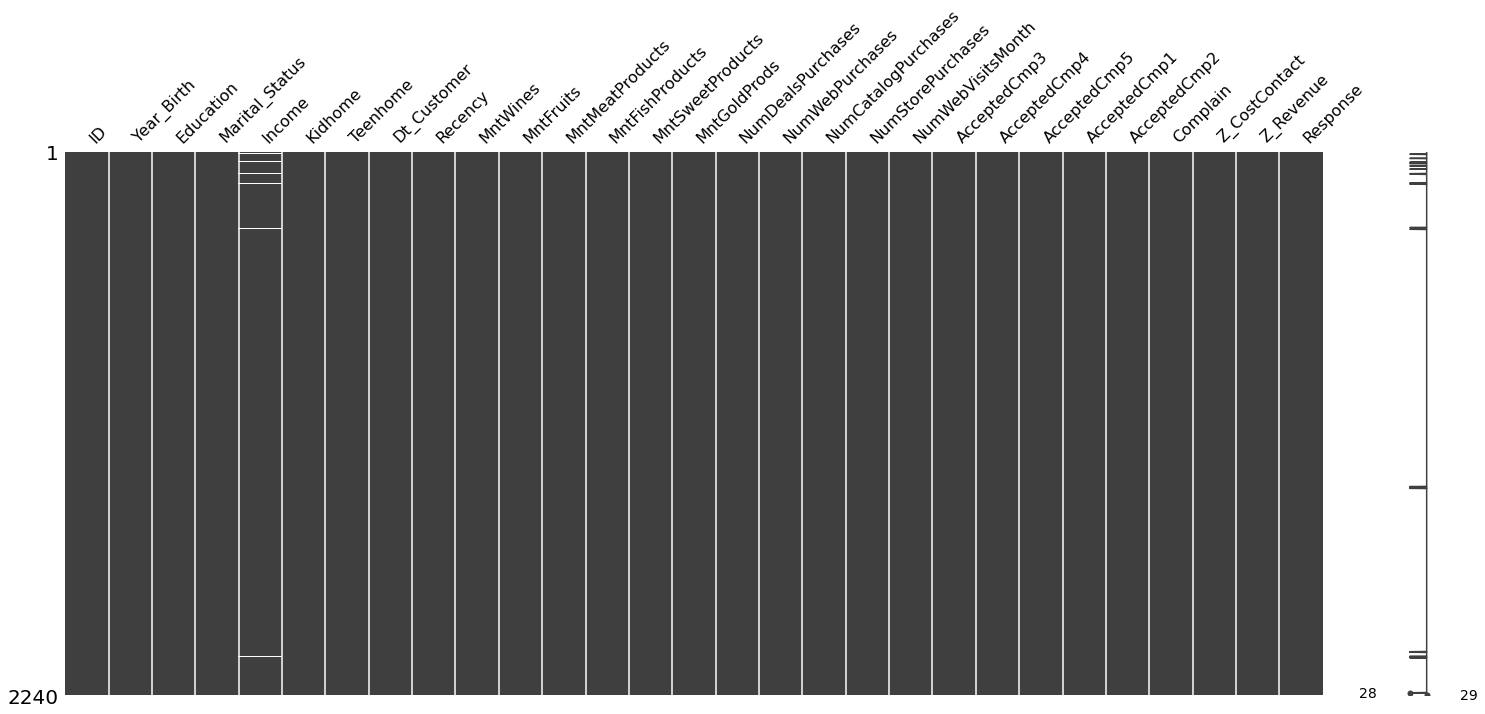

In [6]:
# Visualising the missing values
import missingno as mn

plt.subplot(1, 2, 1) # row 1, col 2 index 1
mn.bar(data) # shows which variable has NAs # row 1, col 2 index 1
mn.matrix(data) # shows which Customer's data is missing

In [7]:
data.Income.describe()


# The mean value (52247.25) and median value (50th percentile which is 51381.50) are close to each other.

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [8]:
# Mean Imputation for Income variable
data['Income']=data['Income'].fillna(data['Income'].median())

In [9]:
data.isna().any() 
# There is no NA values.

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [10]:
# Dropping the variables Z_CostContact & Z_Revenue
data = data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [11]:
### Preprocessing
# Change date format
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [12]:
data.Dt_Customer.describe()


# While the registration date of the newest customer in the records is 2014-12-06, the registration date of the oldest customer in the records is 2012-01-08.

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [13]:
import datetime
data["Customer_date"]= (datetime.datetime.now()-data["Dt_Customer"]).dt.days


# Now, Customer_date is a numeric value where 0 represents today. As the date approaches today, the value of the variable approaches zero.

In [14]:
data[data.duplicated(['ID'])].size # There is no duplicate in dataset.


# There is no duplication in the data.

0

In [15]:
# Adding new variables
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Accepted']= data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

In [16]:
# Marital Status variable categories
data['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [17]:
# Renaming
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('YOLO', 'Single')
data['Education'] = data['Education'].str.replace('2n Cycle', 'Master')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  2012-04-09       58       635  ...             0   
1            1  2014-08-03       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-10-02       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-10-06       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Customer_date  Kids  \
0                0             0         0         1           3700     0   
1                0             0         0         0           2854     2   
2                0             0         0         0           3201     0   
3                0             0         0         0           2794     1   
4                0             0         0         0           3050     1   
...            ...           ...       ...       ...            ...   ...   
2235             0             0         0         0           3270     1   
2236             1             0         0         0           2790     3   
2237             0             0         0         0           3044     0   
2238             0             0         0         0           3045     1   
2239             0             0         0         1           3511     2   

      Expenses  Accepted  Purchases  
0         1617         0         25  
1           27         0          6  
2          776         0         21  
3           53         0          8  
4          422         0         19  
...        ...       ...        ...  
2235      1341         0         18  
2236       444         1         22  
2237      1241         1         19  
2238       843         0         23  
2239       172         0         11  

[2240 rows x 32 columns]

In [18]:
data['Marital_Status'].value_counts() # In relationship=1444 & Single=796

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [19]:
# Education variable categories
data['Education'].value_counts()  

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [20]:
data['Education'] = data['Education'].str.replace('2n Cycle', 'Master')

# The 2nd cycle is considered as Master's degree.

In [21]:
#Age of customers today 

from datetime import datetime
data["Age"] = 2022-data["Year_Birth"]

In [22]:
# Variable which indicates how many members exist in the house

data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "Widow": 1, "Divorced": 1, "Married": 2 , "Together":2})+ data["Kidhome"] + data["Teenhome"]

In [23]:
# Renaming columns
data = data.rename(columns={"MntFruits":"Fruits","MntWines": "Wines","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","MntMeatProducts":"Meat"})

In [24]:
# Removing some variables
data = data.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Dt_Customer', 'Teenhome'])

In [25]:
pd.set_option('display.max_columns', None) # too see all the columns
data.head()

Education Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0  Graduation         Single  58138.0       58    635      88   546   172   
1  Graduation         Single  46344.0       38     11       1     6     2   
2  Graduation       Together  71613.0       26    426      49   127   111   
3  Graduation       Together  26646.0       26     11       4    20    10   
4         PhD        Married  58293.0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Customer_date  Kids  Expenses  Accepted  Purchases  Age  Family_Size  
0           3700     0      1617         0         25   65            1  
1           2854     2        27         0          6   68            3  
2           3201     0       776         0         21   57            2  
3           2794     1        53         0          8   38            3  
4           3050     1       422         0         19   41            3

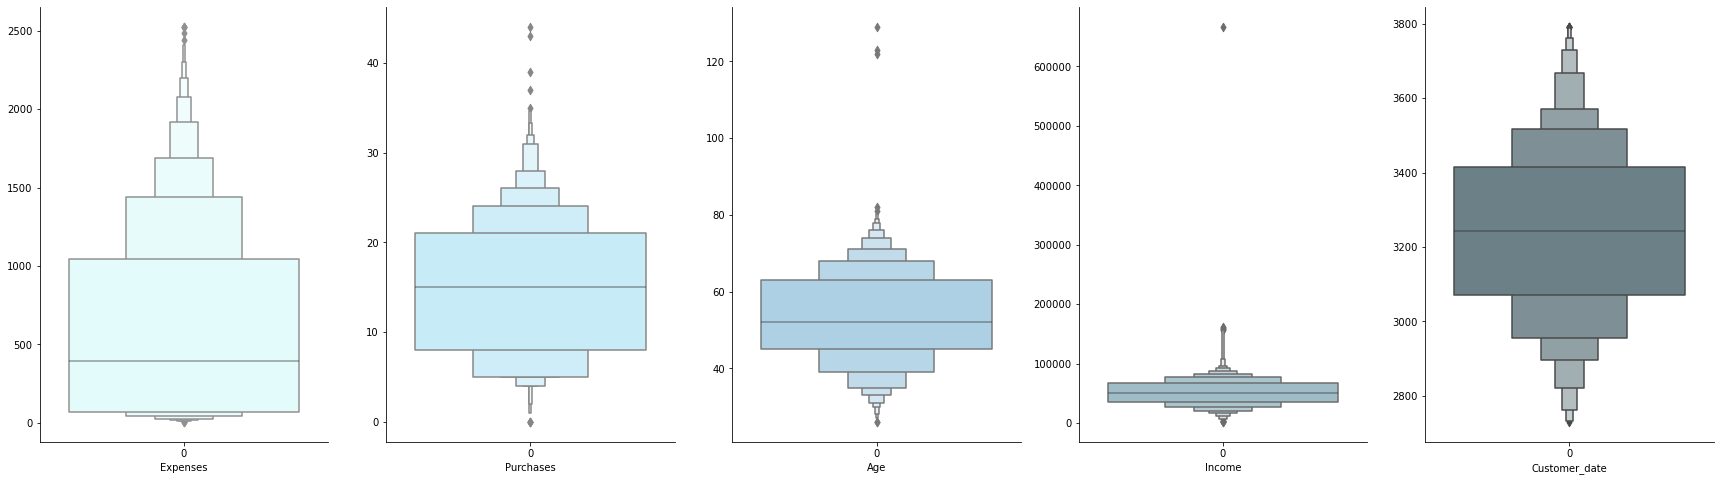

In [26]:
# Boxplots of different features
features= ["Expenses", "Purchases", "Age", "Income", "Customer_date"]
palette = ["#E0FFFF","#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()


# Age, Income & Purchases seem to have outliers. 

In [27]:
len(data) #2240

2240

(array([  4.,   6.,  18.,   8.,  26.,  35.,  50.,  74.,  70.,  71.,  91.,
        101., 104., 103.,  95.,  96.,  83., 115.,  88.,  89.,  84.,  96.,
        102.,  83.,  99.,  75.,  78.,  79.,  79.,  46.,  27.,  21.,  14.,
         10.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1730. ,   4530.1,   7330.2,  10130.3,  12930.4,  15730.5,
         18530.6,  21330.7,  24130.8,  26930.9,  29731. ,  32531.1,
         35331.2,  38131.3,  40931.4,  43731.5,  46531.6,  49331.7,
         52131.8,  54931.9,  57732. ,  60532.1,  63332.2,  66132.3,
         68932.4,  71732.5,  74532.6,  77332.7,  80132.8,  82932.9,
         85733. ,  88533.1,  91333.2,  94133.3,  96933.4,  99733.5,
        102533.6, 105333.7, 108133.8, 110933.9, 113734. ]),
 <a list of 40 Patch objects>)

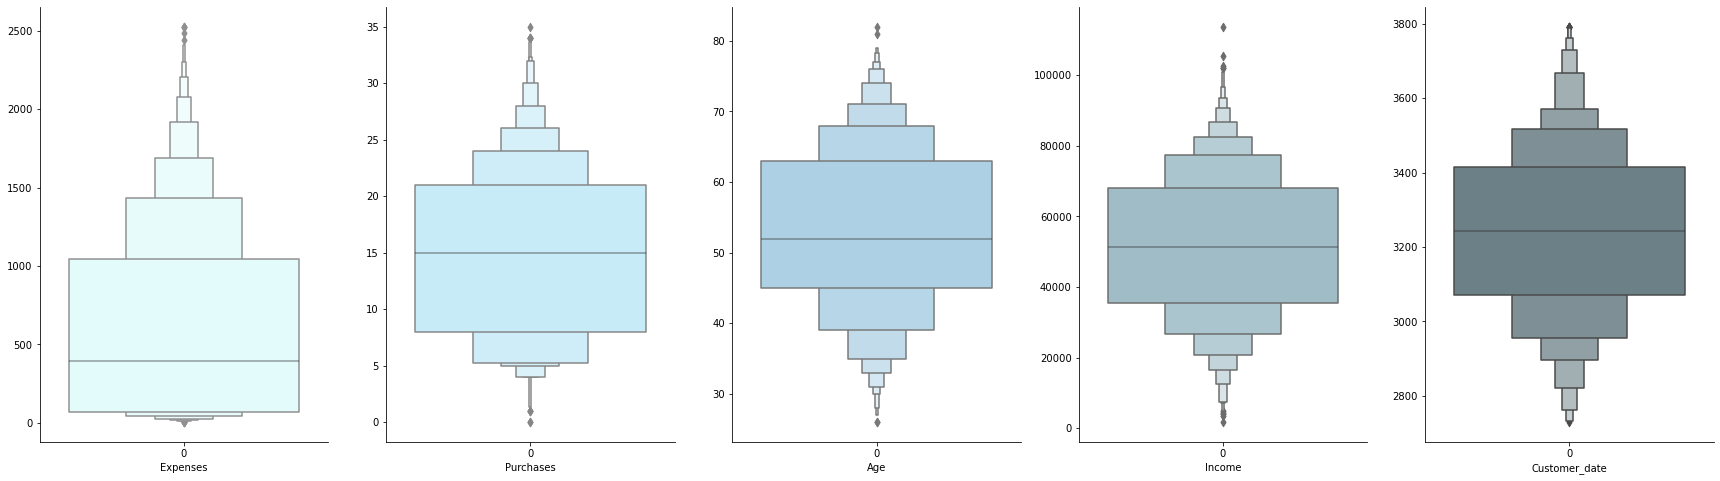

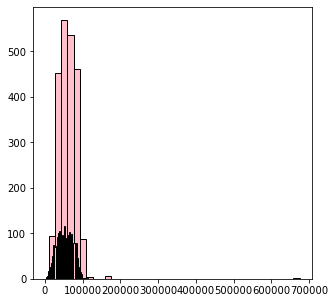

In [28]:
# Dropping the Outliers
from scipy import stats

# Income
data = data[(np.abs(stats.zscore(data['Income'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

# Age
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])




# Purchases
data = data[(np.abs(stats.zscore(data['Purchases'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])


# Any z-score greater than 3 or less than -3 is considered to be an outlier. 




#examine the boxplots of different features
features= ["Expenses", "Purchases", "Age", "Income", "Customer_date"]
palette = ["#E0FFFF","#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()





len(data) #2227


# The number of observations decreased from 2240 to 2227. Change in Outliers can be also seen from the boxplots.




# Income before Outlier reduction
data_new = pd.read_csv("marketing_campaign.csv", sep="\t")

plt.figure(figsize=(5,5))

plt.hist(data_new['Income'], bins=40, align='right', color='pink', edgecolor='black') 





# Income after Outlier reduction
plt.hist(data['Income'], bins=40, align='right', color='pink', edgecolor='black') 


# ### Exploratory Data Analysis






In [29]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


correlation_data = data.loc[:, ~data.columns.isin(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1' ])]

(array([  4.,   6.,  18.,   8.,  26.,  35.,  50.,  74.,  70.,  71.,  91.,
        101., 104., 103.,  95.,  96.,  83., 115.,  88.,  89.,  84.,  96.,
        102.,  83.,  99.,  75.,  78.,  79.,  79.,  46.,  27.,  21.,  14.,
         10.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1730. ,   4530.1,   7330.2,  10130.3,  12930.4,  15730.5,
         18530.6,  21330.7,  24130.8,  26930.9,  29731. ,  32531.1,
         35331.2,  38131.3,  40931.4,  43731.5,  46531.6,  49331.7,
         52131.8,  54931.9,  57732. ,  60532.1,  63332.2,  66132.3,
         68932.4,  71732.5,  74532.6,  77332.7,  80132.8,  82932.9,
         85733. ,  88533.1,  91333.2,  94133.3,  96933.4,  99733.5,
        102533.6, 105333.7, 108133.8, 110933.9, 113734. ]),
 <a list of 40 Patch objects>)

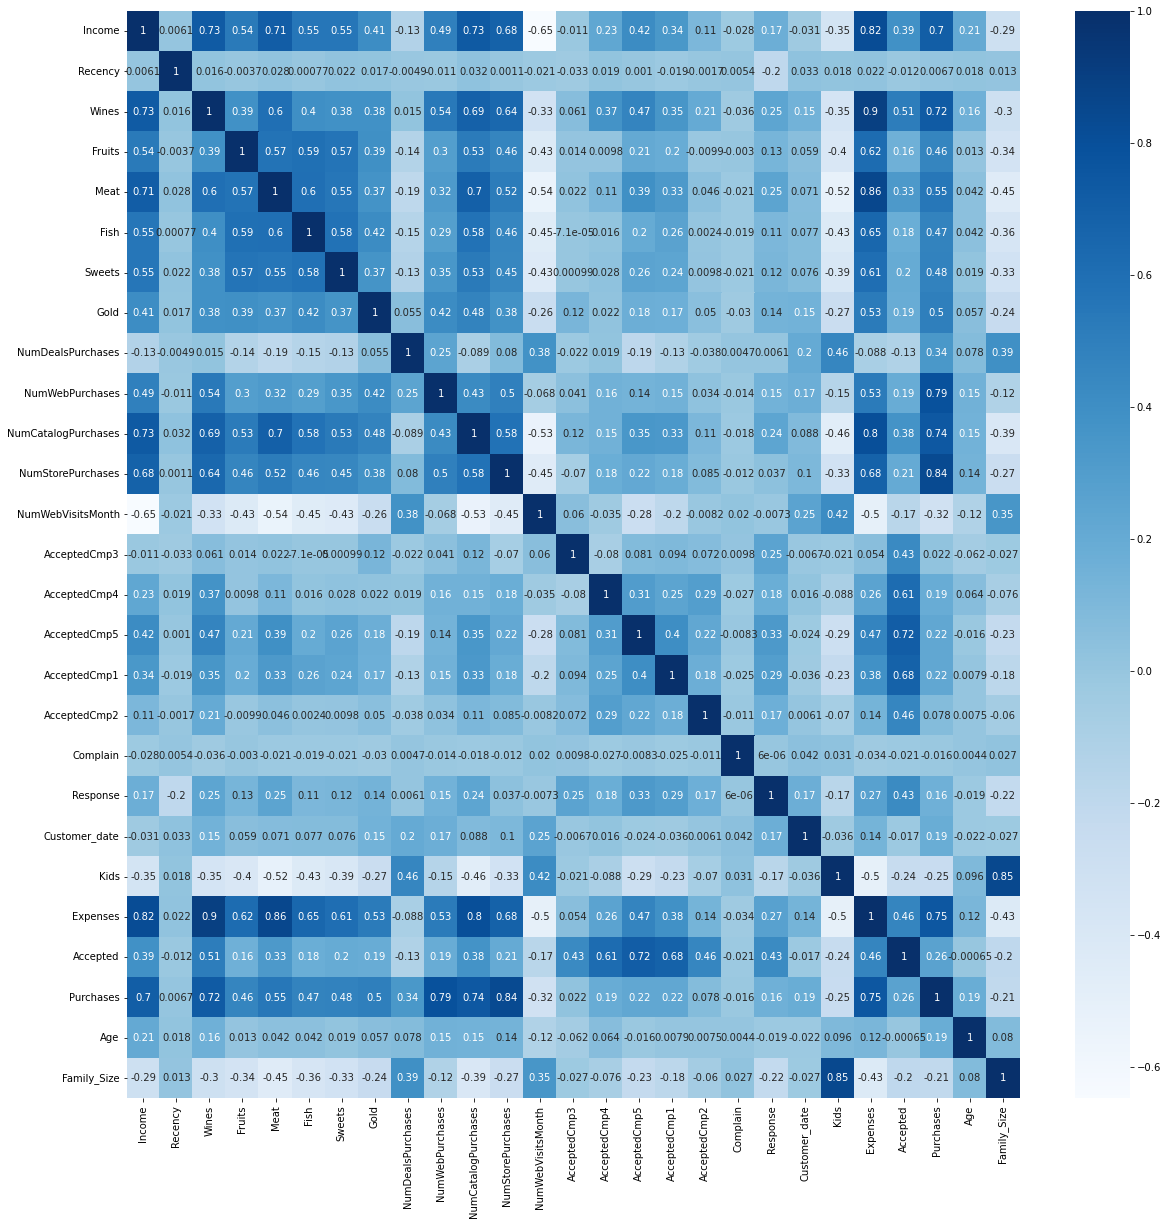

In [30]:
import seaborn as sb
plt.figure(figsize=(20, 20))
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)


# In the Correlation Heatmap, there are many high correlation values. For example, it can be said that Income has strong relationship with Wines, NumCatalogPurchases, Expenses & Purchases with the correlation value more than 0.7. 
# 
# On the other hand, there are negative correlation values between Family size and all the products (Wines, Fruits, Meat, Fish, Sweets, Gold). That means, they have negative relationship between them.
# 




# Income
plt.hist(data['Income'], bins=40, align='right', color='pink', edgecolor='black')





In [31]:
fig = px.box(data, y="Income")
fig.show()


(array([  7.,   3.,  18.,  15.,  18.,  59.,  27.,  74.,  38.,  42.,  83.,
         39., 129.,  50.,  88., 151.,  73., 165.,  77.,  71.,  94.,  50.,
        116.,  45.,  44.,  85.,  51.,  96.,  55.,  49.,  85.,  52.,  72.,
         29.,  21.,  32.,   8.,  14.,   0.,   2.]),
 array([26. , 27.4, 28.8, 30.2, 31.6, 33. , 34.4, 35.8, 37.2, 38.6, 40. ,
        41.4, 42.8, 44.2, 45.6, 47. , 48.4, 49.8, 51.2, 52.6, 54. , 55.4,
        56.8, 58.2, 59.6, 61. , 62.4, 63.8, 65.2, 66.6, 68. , 69.4, 70.8,
        72.2, 73.6, 75. , 76.4, 77.8, 79.2, 80.6, 82. ]),
 <a list of 40 Patch objects>)

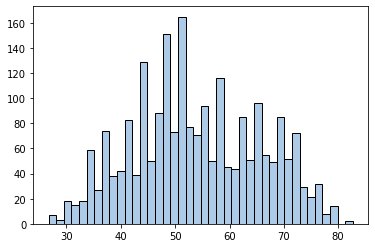

In [32]:
# Age 
plt.hist(data['Age'], bins=40, align='right', color='#adcae6', edgecolor='black')




In [33]:
fig = px.box(data, y="Age")
fig.show()




In [34]:
data.groupby(['Age']).agg({'Age':'count'}).head(5)


# The most common age is 46 with 88 people in the datasets. It is followed by the age 51 with 86 people.



Age
Age     
26     2
27     5
28     3
29     5
30    13

(array([544., 231., 113.,  69.,  95.,  49.,  82.,  65.,  40.,  48.,  50.,
         44.,  53.,  42.,  58.,  62.,  52.,  50.,  68.,  38.,  35.,  44.,
         29.,  36.,  34.,  32.,  32.,  20.,  22.,  11.,  24.,  11.,   9.,
         14.,   4.,   5.,   4.,   3.,   1.,   4.]),
 array([   5.,   68.,  131.,  194.,  257.,  320.,  383.,  446.,  509.,
         572.,  635.,  698.,  761.,  824.,  887.,  950., 1013., 1076.,
        1139., 1202., 1265., 1328., 1391., 1454., 1517., 1580., 1643.,
        1706., 1769., 1832., 1895., 1958., 2021., 2084., 2147., 2210.,
        2273., 2336., 2399., 2462., 2525.]),
 <a list of 40 Patch objects>)

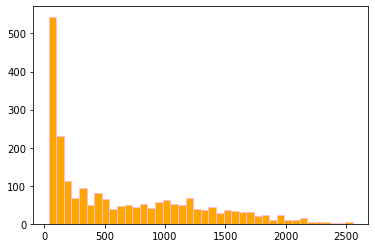

In [35]:
# Expenses (Total amount spent on products in last 2 years)
plt.hist(data['Expenses'], bins=40, align='right', color='orange', edgecolor='pink')

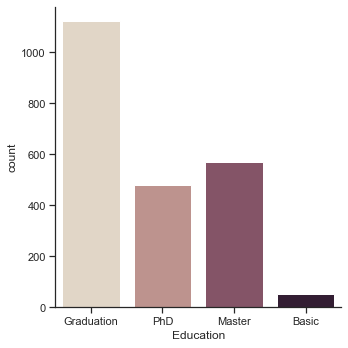

In [36]:
# Education
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
              
sns.catplot(x="Education", kind="count", palette="ch:.25", data=data)


In [37]:

fig =  px.pie (data, names = "Education", hole = 0, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show ()

# Education & Income
fig = px.box(data, x="Education", y="Income")
fig.show()

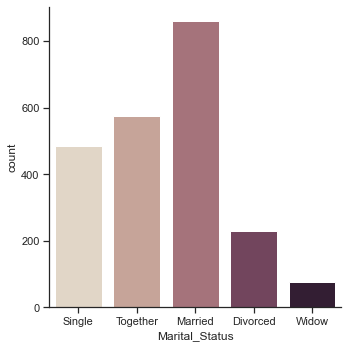

In [38]:
# Marital Status 
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Marital_Status", kind="count", palette="ch:.25", data=data)



fig =  px.pie (data, names = "Marital_Status", hole = 0, color_discrete_sequence=px.colors.sequential.Mint)
fig.show ()


# 35.6% of the customer are single whereas more 64.4% are in relationship.



In [39]:
# In[51]:


# Marital Status & Income
fig = px.box(data, x="Marital_Status", y="Income")
fig.show()

Complain
Complain          
0             2207
1               20

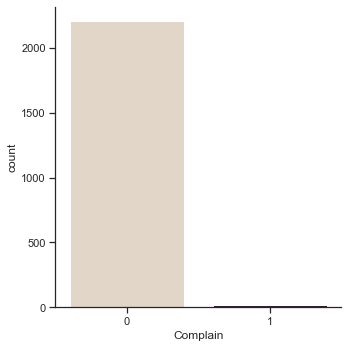

In [40]:
# Complain
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Complain", kind="count", palette="ch:.25", data=data)

data.groupby(['Complain']).agg({'Complain':'count'})


# Complain variable will not be included as only 20 out of 2227 customers complained.


In [41]:
# Removing Complain variable
data = data.drop(columns=['Complain'])

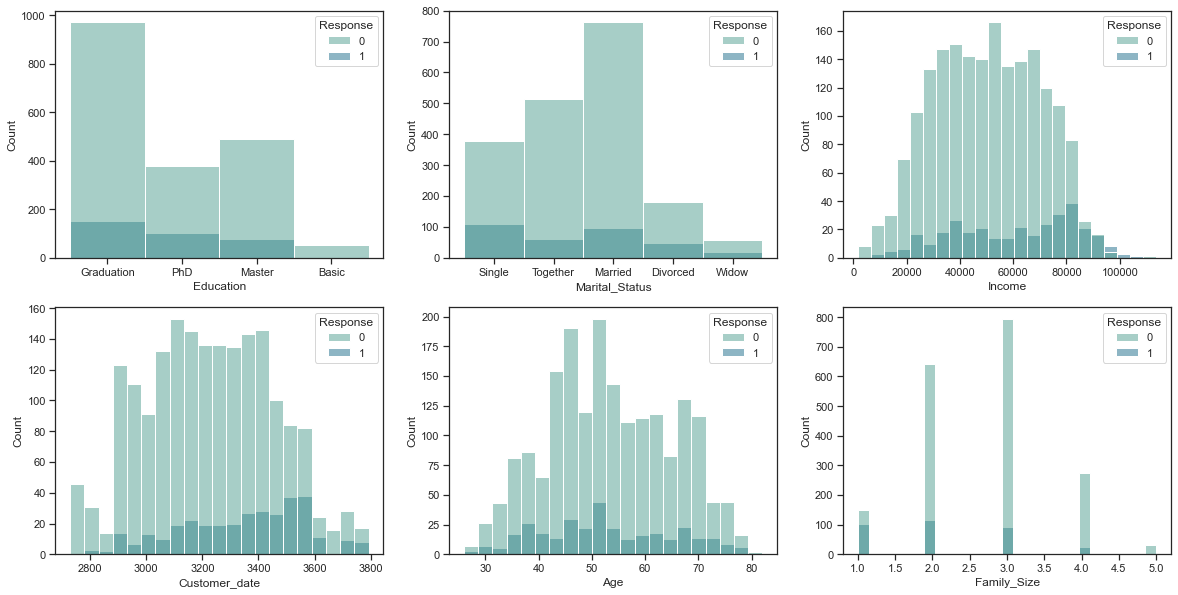

In [42]:
# Distribution of variables by 'Response' variable
data1 = data[['Education','Marital_Status','Income','Customer_date', 'Age', 'Family_Size','Response']]

plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = data1.columns

a = 0

for i in cols[0:6]:
  sns.histplot(data = data1, x = i, hue = 'Response', ax = axes[a], 
               palette = 'crest')
  a= a+1


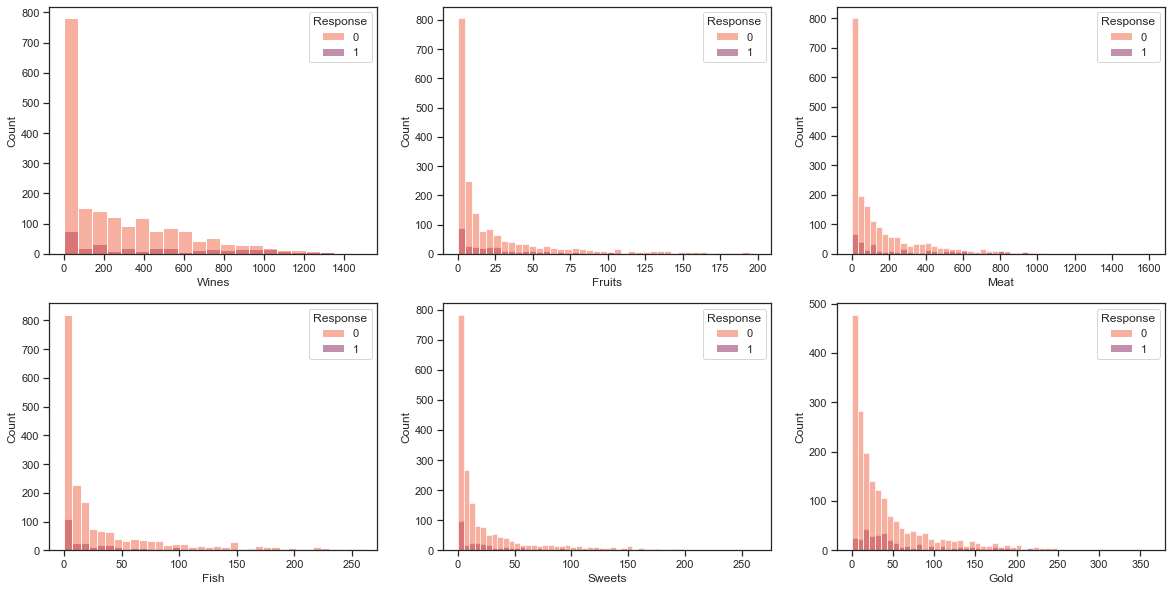

In [43]:
# Distribution of Product variables by 'Response' variable
data2=data[['Wines','Fruits','Meat','Fish','Sweets','Gold','Response']]

plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
cols2 = data2.columns
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0


for i in cols2[0:6]:
  sns.histplot(data = data2, x = i, hue = 'Response', ax = axes[a], 
               palette = 'rocket_r')
  a= a+1

In [44]:
# Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [45]:

encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)
data["Marital_Status"]= data[["Marital_Status"]].apply(encoder.fit_transform)

data = pd.get_dummies(data)
Data_Show=data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2227 non-null   int32  
 1   Marital_Status       2227 non-null   int32  
 2   Income               2227 non-null   float64
 3   Recency              2227 non-null   int64  
 4   Wines                2227 non-null   int64  
 5   Fruits               2227 non-null   int64  
 6   Meat                 2227 non-null   int64  
 7   Fish                 2227 non-null   int64  
 8   Sweets               2227 non-null   int64  
 9   Gold                 2227 non-null   int64  
 10  NumDealsPurchases    2227 non-null   int64  
 11  NumWebPurchases      2227 non-null   int64  
 12  NumCatalogPurchases  2227 non-null   int64  
 13  NumStorePurchases    2227 non-null   int64  
 14  NumWebVisitsMonth    2227 non-null   int64  
 15  AcceptedCmp3         2227 non-null   i

In [46]:
# Standardization

data = data.copy()

for i in data.select_dtypes(exclude='object').columns:
    data.loc[:, i] = StandardScaler().fit_transform(np.array(data[[i]]))

data.shape
# Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance). It makes the continous variables all equally important to the analysis.


(2227, 28)

In [47]:
np.mean(data),np.std(data)
data.head()

Education  Marital_Status    Income   Recency     Wines    Fruits  \
0  -0.790547        0.250663  0.316058  0.307547  0.979866  1.550265   
1  -0.790547        0.250663 -0.257112 -0.383371 -0.873160 -0.637481   
2  -0.790547        1.193612  0.970922 -0.797923  0.359221  0.569551   
3  -0.790547        1.193612 -1.214404 -0.797923 -0.873160 -0.562042   
4   1.593405       -0.692287  0.323591  1.551201 -0.392086  0.418672   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.758680  2.458836  1.472844  0.842689           0.372349         1.406644   
1 -0.731170 -0.651505 -0.632699 -0.731697          -0.166106        -1.117898   
2 -0.173259  1.342773 -0.148666 -0.040503          -0.704561         1.406644   
3 -0.666618 -0.505136 -0.584295 -0.750897          -0.166106        -0.757249   
4 -0.214757  0.153525 -0.003456 -0.558899           1.449258         0.324697   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.688442          -0.559799           0.689687     -0.281021   
1            -0.591794          -1.177115          -0.138979     -0.281021   
2            -0.227324           1.292152          -0.553312     -0.281021   
3            -0.956265          -0.559799           0.275354     -0.281021   
4             0.137147           0.057518          -0.138979     -0.281021   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0     -0.284724      -0.28009     -0.262928     -0.116855  2.380686   
1     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
2     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
3     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
4     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   

   Customer_date      Kids  Expenses  Accepted  Purchases       Age  \
0       1.975785 -1.265607  1.685251  -0.43999   1.339056  1.015119   
1      -1.665893  1.394617 -0.962060  -0.43999  -1.166449  1.271354   
2      -0.172203 -1.265607  0.285007  -0.43999   0.811582  0.331828   
3      -1.924168  0.064505 -0.918770  -0.43999  -0.902711 -1.290990   
4      -0.822195  0.064505 -0.304394  -0.43999   0.547844 -1.034756   

   Family_Size  
0    -1.758799  
1     0.446011  
2    -0.656394  
3     0.446011  
4     0.446011

In [48]:
# import KMeans
from sklearn.cluster import KMeans

# Elbow Method




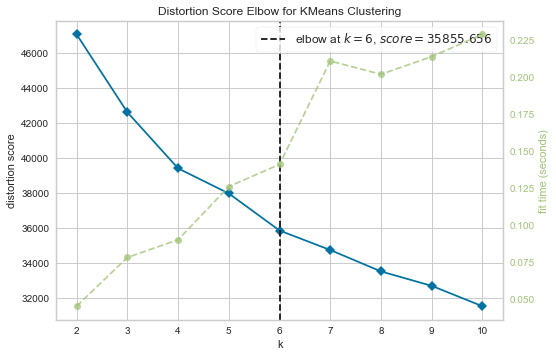

In [49]:
# Elbow Method is used for finding the best K in KMeans. 
# we use elbow method for finding the good k number of clusters. with each additional cluster the summed distance between the points and the cluster center becomes smaller. However, there is a optimum number for k after which, the addisitonal cluster reduces the summed distance only slightly. We pick this number for the clusters.
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(data)
elbow.show()

# K-MEANS

In [50]:
# create the estimator and set clusters to 5
clusters = KMeans(n_clusters=5).fit(data)
data_Kmeans = data.copy()
Cluster_Analysis = Data_Show.copy()
data_Kmeans["Clusters"]= clusters.labels_
Cluster_Analysis["Clusters"]= clusters.labels_
data_Kmeans.head()

Education  Marital_Status    Income   Recency     Wines    Fruits  \
0  -0.790547        0.250663  0.316058  0.307547  0.979866  1.550265   
1  -0.790547        0.250663 -0.257112 -0.383371 -0.873160 -0.637481   
2  -0.790547        1.193612  0.970922 -0.797923  0.359221  0.569551   
3  -0.790547        1.193612 -1.214404 -0.797923 -0.873160 -0.562042   
4   1.593405       -0.692287  0.323591  1.551201 -0.392086  0.418672   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.758680  2.458836  1.472844  0.842689           0.372349         1.406644   
1 -0.731170 -0.651505 -0.632699 -0.731697          -0.166106        -1.117898   
2 -0.173259  1.342773 -0.148666 -0.040503          -0.704561         1.406644   
3 -0.666618 -0.505136 -0.584295 -0.750897          -0.166106        -0.757249   
4 -0.214757  0.153525 -0.003456 -0.558899           1.449258         0.324697   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.688442          -0.559799           0.689687     -0.281021   
1            -0.591794          -1.177115          -0.138979     -0.281021   
2            -0.227324           1.292152          -0.553312     -0.281021   
3            -0.956265          -0.559799           0.275354     -0.281021   
4             0.137147           0.057518          -0.138979     -0.281021   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0     -0.284724      -0.28009     -0.262928     -0.116855  2.380686   
1     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
2     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
3     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
4     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   

   Customer_date      Kids  Expenses  Accepted  Purchases       Age  \
0       1.975785 -1.265607  1.685251  -0.43999   1.339056  1.015119   
1      -1.665893  1.394617 -0.962060  -0.43999  -1.166449  1.271354   
2      -0.172203 -1.265607  0.285007  -0.43999   0.811582  0.331828   
3      -1.924168  0.064505 -0.918770  -0.43999  -0.902711 -1.290990   
4      -0.822195  0.064505 -0.304394  -0.43999   0.547844 -1.034756   

   Family_Size  Clusters  
0    -1.758799         2  
1     0.446011         0  
2    -0.656394         2  
3     0.446011         0  
4     0.446011         1

In [51]:
# Renaming the clusters
data_Kmeans_copy = data_Kmeans.copy()
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(0 , 'Cluster 1')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(1, 'Cluster 2')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(2, 'Cluster 3')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(3, 'Cluster 4')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(4, 'Cluster 5')

data_Kmeans_copy.tail()

Education  Marital_Status    Income   Recency     Wines    Fruits  \
2222  -0.790547       -0.692287  0.465984 -0.107004  1.199615  0.418672   
2223   1.593405        1.193612  0.601623  0.238455  0.299829 -0.662628   
2224  -0.790547       -1.635236  0.259830  1.447563  1.790564  0.544404   
2225   0.401429        1.193612  0.855841 -1.419749  0.365160  0.091767   
2226   1.593405       -0.692287  0.059993 -0.314280 -0.656380 -0.587188   

          Meat      Fish    Sweets      Gold  NumDealsPurchases  \
2222  0.080337  0.080340  2.198894  3.895463          -0.166106   
2223 -0.620510 -0.688097 -0.656900 -0.693298           2.526168   
2224  0.241716 -0.102621 -0.366480 -0.386100          -0.704561   
2225  0.227883  0.775593  0.069149  0.324294          -0.166106   
2226 -0.477574 -0.651505 -0.632699 -0.443700           0.372349   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2222         1.767293             0.137147          -0.559799   
2223         1.406644            -0.227324          -0.251140   
2224        -0.757249             0.137147           2.218127   
2225         0.685346             0.866088           1.292152   
2226        -0.396600            -0.591794          -0.559799   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2222          -0.138979     -0.281021     -0.284724      -0.28009   
2223           0.689687     -0.281021     -0.284724      -0.28009   
2224           0.275354     -0.281021      3.512169      -0.28009   
2225          -0.967645     -0.281021     -0.284724      -0.28009   
2226           0.689687     -0.281021     -0.284724      -0.28009   

      AcceptedCmp1  AcceptedCmp2  Response  Customer_date      Kids  Expenses  \
2222     -0.262928     -0.116855 -0.420047       0.124814  0.064505  1.225718   
2223      3.803325     -0.116855 -0.420047      -1.941387  2.724729 -0.267765   
2224     -0.262928     -0.116855 -0.420047      -0.848022 -1.265607  1.059220   
2225     -0.262928     -0.116855 -0.420047      -0.843718  0.064505  0.396560   
2226     -0.262928     -0.116855  2.380686       1.162218  1.394617 -0.720638   

      Accepted  Purchases       Age  Family_Size   Clusters  
2222 -0.439990   0.415976  0.161005     0.446011  Cluster 3  
2223  1.031268   0.943450  1.954646     2.650822  Cluster 2  
2224  1.031268   0.547844 -1.034756    -1.758799  Cluster 3  
2225 -0.439990   1.075319  1.100531     0.446011  Cluster 2  
2226 -0.439990  -0.507105  1.271354     1.548417  Cluster 1

In [52]:
# Visualizing the clusters
fig =  px.pie (data_Kmeans_copy, names = "Clusters", hole = 0, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show ()

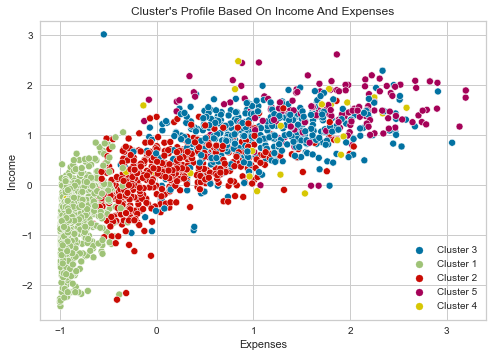

In [53]:
pl = sns.scatterplot(data = data_Kmeans_copy,x=data_Kmeans_copy["Expenses"], y=data_Kmeans_copy["Income"],hue=data_Kmeans_copy["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Expenses")
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



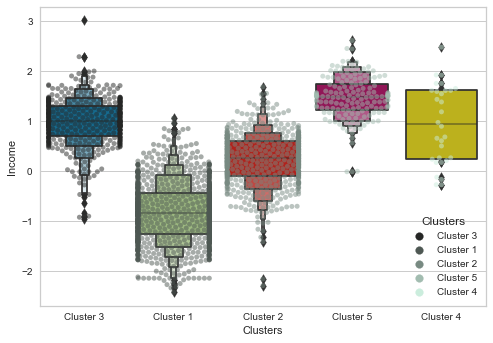

In [54]:
plt.figure()
pl=sns.swarmplot(x=data_Kmeans_copy["Clusters"], y=data_Kmeans_copy["Income"], color= "#CBEDDD",hue=data_Kmeans_copy["Clusters"], alpha=0.5)
pl=sns.boxenplot(x=data_Kmeans_copy["Clusters"], y=data_Kmeans_copy["Income"])
plt.show()

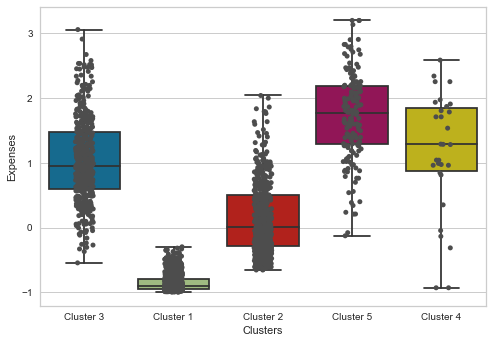

In [55]:
ax = sns.boxplot(x="Clusters", y="Expenses", data=data_Kmeans_copy, whis=np.inf)
ax = sns.stripplot(x="Clusters", y="Expenses", data=data_Kmeans_copy, color=".3")

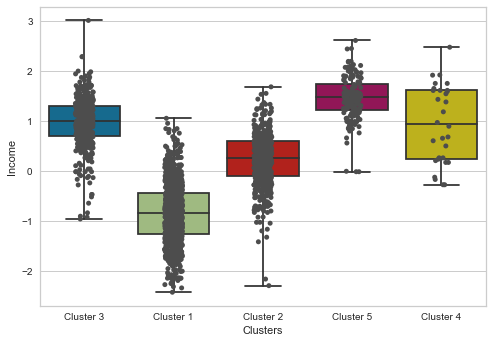

In [56]:
ax = sns.boxplot(x="Clusters", y="Income", data=data_Kmeans_copy, whis=np.inf)
ax = sns.stripplot(x="Clusters", y="Income", data=data_Kmeans_copy, color=".3")

In [57]:
Cluster_Analysis.head()

Education  Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0          1               2  58138.0       58    635      88   546   172   
1          1               2  46344.0       38     11       1     6     2   
2          1               3  71613.0       26    426      49   127   111   
3          1               3  26646.0       26     11       4    20    10   
4          3               1  58293.0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Customer_date  Kids  \
0             0             0             0         1           3700     0   
1             0             0             0         0           2854     2   
2             0             0             0         0           3201     0   
3             0             0             0         0           2794     1   
4             0             0             0         0           3050     1   

   Expenses  Accepted  Purchases  Age  Family_Size  Clusters  
0      1617         0         25   65            1         2  
1        27         0          6   68            3         0  
2       776         0         21   57            2         2  
3        53         0          8   38            3         0  
4       422         0         19   41            3         1

In [83]:
#Analysis for Cluster 1
Cluster1 = Cluster_Analysis[Cluster_Analysis["Clusters"] == 0]
print("Analysis for Cluster 1:")
Age_info= (len(Cluster1[Cluster1["Age"]<60])/len(Cluster1))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster1[Cluster1["Kids"]==1]) + len(Cluster1[Cluster1["Kids"]==2]))/len(Cluster1))*100
print("{:.2f}% of families in This cluster have 1 to 2  kids".format(Kids_info))
Family_Status= ((len(Cluster1[Cluster1["Marital_Status"]==1]) + len(Cluster1[Cluster1["Marital_Status"]==3]))/len(Cluster1))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))
Income= (len(Cluster1[Cluster1["Income"]<40000])/len(Cluster1))*100
print("There are {:.2f}% customers with income below 40000 in This Cluster ".format(Income))

#Analysis for Cluster 2
Cluster2 = Cluster_Analysis[Cluster_Analysis["Clusters"] == 1]
print("Analysis for Cluster 2:")
Age_info= (len(Cluster2[Cluster2["Age"]<60])/len(Cluster2))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster2[Cluster2["Kids"]==1]) + len(Cluster2[Cluster2["Kids"]==2]))/len(Cluster2))*100
print("{:.2f}% of families have 1 to 2 kids".format(Kids_info))
Family_Status= ((len(Cluster2[Cluster2["Marital_Status"]==1]) + len(Cluster2[Cluster2["Marital_Status"]==3]))/len(Cluster2))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))
Income= (len(Cluster2[Cluster2["Income"]>60000])/len(Cluster2))*100
print("There are {:.2f}% customers with income over 60,000 in This Cluster ".format(Income))

#Analysis for Cluster 3
Cluster3 = Cluster_Analysis[Cluster_Analysis["Clusters"] == 2]
print("Analysis for Cluster 3:")
Age_info= (len(Cluster3[Cluster3["Age"]<60])/len(Cluster3))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster3[Cluster3["Kids"]==1])+ len(Cluster3[Cluster3["Kids"]==2]))/len(Cluster3))*100
print("{:.2f}% of families have 1 to 2 kids".format(Kids_info))
Family_Status= ((len(Cluster3[Cluster3["Marital_Status"]==1]) + len(Cluster3[Cluster3["Marital_Status"]==3]))/len(Cluster3))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))
Income= (len(Cluster3[Cluster3["Income"]>60000])/len(Cluster3))*100
print("There are {:.2f}% customers over 60000 income in This Cluster ".format(Income))

#Analysis for Cluster 4
Cluster4 = Cluster_Analysis[Cluster_Analysis["Clusters"] == 3]
print("Analysis for Cluster 4:")
Age_info= (len(Cluster4[Cluster4["Age"]<60])/len(Cluster4))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster4[Cluster4["Kids"]==0])) / len(Cluster4))*100
print("{:.2f}% of families have No kids".format(Kids_info))
Family_Status= ((len(Cluster4[Cluster4["Marital_Status"]==1]) + len(Cluster4[Cluster4["Marital_Status"]==3]))/len(Cluster4))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))
Income= (len(Cluster4[Cluster4["Income"]>60000])/len(Cluster4))*100
print("There are {:.2f}% customers with income over 60000 in This Cluster ".format(Income))

#Analysis for Cluster 5
Cluster5 = Cluster_Analysis[Cluster_Analysis["Clusters"] == 4]
print("Analysis for Cluster 5:")
Age_info= (len(Cluster5[Cluster5["Age"]<60])/len(Cluster5))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster5[Cluster5["Kids"]==0]))/len(Cluster5))*100
print("{:.2f}% of families have No kids".format(Kids_info))
Family_Status= ((len(Cluster5[Cluster5["Marital_Status"]==1]) + len(Cluster5[Cluster5["Marital_Status"]==3]))/len(Cluster5))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))
Income= (len(Cluster5[Cluster5["Income"]>60000])/len(Cluster5))*100
print("There are {:.2f}% customers with income over 60000 in This Cluster ".format(Income))

Analysis for Cluster 1:
There are 78.18% customers below 60 in This Cluster 
84.05% of families in This cluster have 1 to 2  kids
64.58% of the customers are Married or Living Together
There are 67.32% customers with income below 40000 in This Cluster 
Analysis for Cluster 2:
There are 58.15% customers below 60 in This Cluster 
92.03% of families have 1 to 2 kids
68.12% of the customers are Married or Living Together
There are 37.68% customers with income over 60,000 in This Cluster 
Analysis for Cluster 3:
There are 61.87% customers below 60 in This Cluster 
30.07% of families have 1 to 2 kids
59.04% of the customers are Married or Living Together
There are 91.07% customers over 60000 income in This Cluster 
Analysis for Cluster 4:
There are 60.00% customers below 60 in This Cluster 
60.00% of families have No kids
63.33% of the customers are Married or Living Together
There are 66.67% customers with income over 60000 in This Cluster 
Analysis for Cluster 5:
There are 67.07% customers

# Principal Component Analysis

In [59]:
pca = PCA(n_components = 0.75)
pca.fit(data)
principal_features = pd.DataFrame(pca.transform(data), columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"
                                                               , "Feature 6", "Feature 7", "Feature 8", "Feature 9", "Feature 10"])
print("We have",len(principal_features.columns), "principal features")
principal_features.head()

We have 10 principal features


Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   4.577086  -1.536535  -0.075980   2.947283   0.071755  -1.059506   
1  -2.958942   0.278060  -0.601206  -1.606548  -0.529069   1.165192   
2   1.812252  -1.392683  -0.763250  -0.132281   0.112310  -0.519557   
3  -2.891156   0.487421  -1.244689  -0.316321   0.069621   0.654255   
4  -0.322473  -1.070641   0.606093  -0.753628   0.043979   0.058758   

   Feature 7  Feature 8  Feature 9  Feature 10  
0   1.450525  -0.094282  -0.869158    1.840961  
1   0.171453  -0.792849   0.446332    1.005672  
2   0.716867  -1.012586   1.353195   -0.253282  
3   0.192431  -1.287839   0.854331   -1.550541  
4  -0.954532   1.407960  -0.661424   -1.527076

# Elbow Method

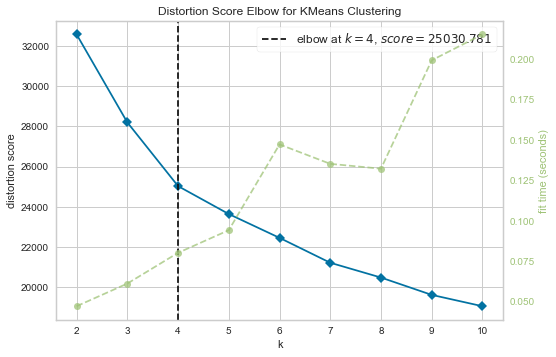

In [60]:
# import KMeans
from sklearn.cluster import KMeans
# Elbow Method is used for finding the best K in KMeans. 
# we use elbow method for finding the good k number of clusters. with each additional cluster the summed distance between the points and the cluster center becomes smaller. However, there is a optimum number for k after which, the addisitonal cluster reduces the summed distance only slightly. We pick this number for the clusters.
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(principal_features)
elbow.show()

# K-MEANS With PCA

In [61]:
# fit the model with 4 clusters
clusters = KMeans(n_clusters=4).fit(principal_features)
data_Kmeans = data.copy()
Cluster_Analysis_PCA = Data_Show.copy()

# access the clusters 
data_Kmeans["Clusters"]= clusters.labels_
Cluster_Analysis_PCA["Clusters"]= clusters.labels_
data_Kmeans.head()

Education  Marital_Status    Income   Recency     Wines    Fruits  \
0  -0.790547        0.250663  0.316058  0.307547  0.979866  1.550265   
1  -0.790547        0.250663 -0.257112 -0.383371 -0.873160 -0.637481   
2  -0.790547        1.193612  0.970922 -0.797923  0.359221  0.569551   
3  -0.790547        1.193612 -1.214404 -0.797923 -0.873160 -0.562042   
4   1.593405       -0.692287  0.323591  1.551201 -0.392086  0.418672   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.758680  2.458836  1.472844  0.842689           0.372349         1.406644   
1 -0.731170 -0.651505 -0.632699 -0.731697          -0.166106        -1.117898   
2 -0.173259  1.342773 -0.148666 -0.040503          -0.704561         1.406644   
3 -0.666618 -0.505136 -0.584295 -0.750897          -0.166106        -0.757249   
4 -0.214757  0.153525 -0.003456 -0.558899           1.449258         0.324697   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.688442          -0.559799           0.689687     -0.281021   
1            -0.591794          -1.177115          -0.138979     -0.281021   
2            -0.227324           1.292152          -0.553312     -0.281021   
3            -0.956265          -0.559799           0.275354     -0.281021   
4             0.137147           0.057518          -0.138979     -0.281021   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0     -0.284724      -0.28009     -0.262928     -0.116855  2.380686   
1     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
2     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
3     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
4     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   

   Customer_date      Kids  Expenses  Accepted  Purchases       Age  \
0       1.975785 -1.265607  1.685251  -0.43999   1.339056  1.015119   
1      -1.665893  1.394617 -0.962060  -0.43999  -1.166449  1.271354   
2      -0.172203 -1.265607  0.285007  -0.43999   0.811582  0.331828   
3      -1.924168  0.064505 -0.918770  -0.43999  -0.902711 -1.290990   
4      -0.822195  0.064505 -0.304394  -0.43999   0.547844 -1.034756   

   Family_Size  Clusters  
0    -1.758799         1  
1     0.446011         0  
2    -0.656394         1  
3     0.446011         0  
4     0.446011         3

In [62]:
#Renaming the clusters
data_Kmeans_copy = data_Kmeans.copy()
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(0 , 'Cluster 1')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(1, 'Cluster 2')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(2, 'Cluster 3')
data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(3, 'Cluster 4')
#data_Kmeans_copy['Clusters'] = data_Kmeans_copy['Clusters'].replace(4, 'Cluster 5')
data_Kmeans_copy.tail()

Education  Marital_Status    Income   Recency     Wines    Fruits  \
2222  -0.790547       -0.692287  0.465984 -0.107004  1.199615  0.418672   
2223   1.593405        1.193612  0.601623  0.238455  0.299829 -0.662628   
2224  -0.790547       -1.635236  0.259830  1.447563  1.790564  0.544404   
2225   0.401429        1.193612  0.855841 -1.419749  0.365160  0.091767   
2226   1.593405       -0.692287  0.059993 -0.314280 -0.656380 -0.587188   

          Meat      Fish    Sweets      Gold  NumDealsPurchases  \
2222  0.080337  0.080340  2.198894  3.895463          -0.166106   
2223 -0.620510 -0.688097 -0.656900 -0.693298           2.526168   
2224  0.241716 -0.102621 -0.366480 -0.386100          -0.704561   
2225  0.227883  0.775593  0.069149  0.324294          -0.166106   
2226 -0.477574 -0.651505 -0.632699 -0.443700           0.372349   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2222         1.767293             0.137147          -0.559799   
2223         1.406644            -0.227324          -0.251140   
2224        -0.757249             0.137147           2.218127   
2225         0.685346             0.866088           1.292152   
2226        -0.396600            -0.591794          -0.559799   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2222          -0.138979     -0.281021     -0.284724      -0.28009   
2223           0.689687     -0.281021     -0.284724      -0.28009   
2224           0.275354     -0.281021      3.512169      -0.28009   
2225          -0.967645     -0.281021     -0.284724      -0.28009   
2226           0.689687     -0.281021     -0.284724      -0.28009   

      AcceptedCmp1  AcceptedCmp2  Response  Customer_date      Kids  Expenses  \
2222     -0.262928     -0.116855 -0.420047       0.124814  0.064505  1.225718   
2223      3.803325     -0.116855 -0.420047      -1.941387  2.724729 -0.267765   
2224     -0.262928     -0.116855 -0.420047      -0.848022 -1.265607  1.059220   
2225     -0.262928     -0.116855 -0.420047      -0.843718  0.064505  0.396560   
2226     -0.262928     -0.116855  2.380686       1.162218  1.394617 -0.720638   

      Accepted  Purchases       Age  Family_Size   Clusters  
2222 -0.439990   0.415976  0.161005     0.446011  Cluster 2  
2223  1.031268   0.943450  1.954646     2.650822  Cluster 4  
2224  1.031268   0.547844 -1.034756    -1.758799  Cluster 2  
2225 -0.439990   1.075319  1.100531     0.446011  Cluster 4  
2226 -0.439990  -0.507105  1.271354     1.548417  Cluster 1

In [63]:
fig =  px.pie (data_Kmeans_copy, names = "Clusters", hole = 0, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show ()

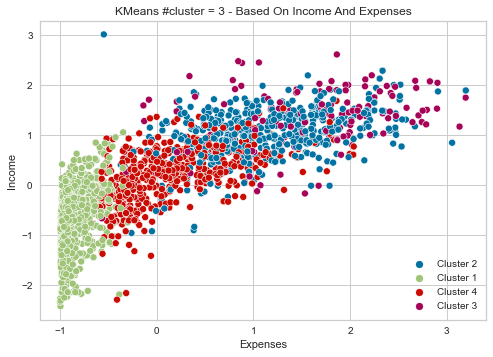

In [64]:
# Plotting clusters
pl = sns.scatterplot(data = data_Kmeans_copy,x=data_Kmeans_copy["Expenses"], y=data_Kmeans_copy["Income"],hue=data_Kmeans_copy["Clusters"])
pl.set_title("KMeans #cluster = 3 - Based On Income And Expenses")
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



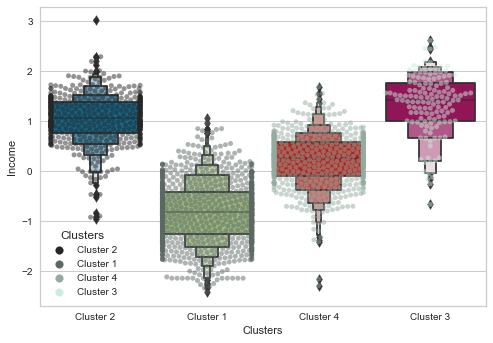

In [65]:

plt.figure()
pl=sns.swarmplot(x=data_Kmeans_copy["Clusters"], y=data_Kmeans_copy["Income"], color= "#CBEDDD",hue=data_Kmeans_copy["Clusters"], alpha=0.5)
pl=sns.boxenplot(x=data_Kmeans_copy["Clusters"], y=data_Kmeans_copy["Income"])
plt.show()

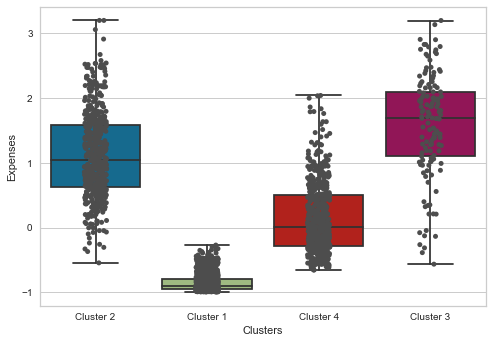

In [66]:
ax = sns.boxplot(x="Clusters", y="Expenses", data=data_Kmeans_copy, whis=np.inf)
ax = sns.stripplot(x="Clusters", y="Expenses", data=data_Kmeans_copy, color=".3")

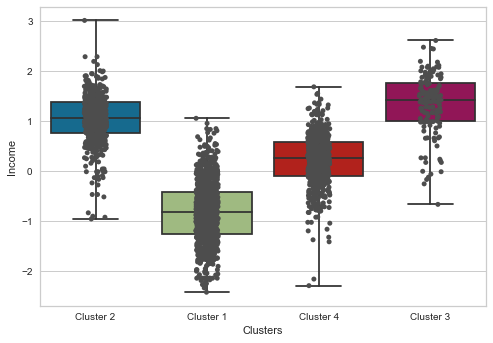

In [67]:
ax = sns.boxplot(x="Clusters", y="Income", data=data_Kmeans_copy, whis=np.inf)
ax = sns.stripplot(x="Clusters", y="Income", data=data_Kmeans_copy, color=".3")

In [68]:
Cluster1 = Cluster_Analysis_PCA[Cluster_Analysis_PCA["Clusters"] == 0]

In [69]:
#Analysis for Cluster 1
print("Analysis for Cluster 1:")
Age_info= (len(Cluster1[Cluster1["Age"]<60])/len(Cluster1))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster1[Cluster1["Kids"]==1]) + len(Cluster1[Cluster1["Kids"]==2]))/len(Cluster1))*100
print("{:.2f}% of families in Cluster 1 have 1-2 kids".format(Kids_info))
Family_Status= ((len(Cluster1[Cluster1["Marital_Status"]==1]) + len(Cluster1[Cluster1["Marital_Status"]==3]))/len(Cluster1))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))

#Analysis for Cluster 2
Cluster2 = Cluster_Analysis_PCA[Cluster_Analysis_PCA["Clusters"] == 1]
print("Analysis for Cluster 2:")
Age_info= (len(Cluster2[Cluster2["Age"]<60])/len(Cluster2))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster2[Cluster2["Kids"]==0]))/len(Cluster2))*100
print("{:.2f}% of families have No kids".format(Kids_info))
Family_Status= ((len(Cluster2[Cluster2["Marital_Status"]==1]) + len(Cluster2[Cluster2["Marital_Status"]==3]))/len(Cluster2))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))

#Analysis for Cluster 3
Cluster3 = Cluster_Analysis_PCA[Cluster_Analysis_PCA["Clusters"] == 2]
print("Analysis for Cluster 3:")
Age_info= (len(Cluster3[Cluster3["Age"]<60])/len(Cluster3))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster3[Cluster3["Kids"]==0]))/len(Cluster3))*100
print("{:.2f}% of families have No kids".format(Kids_info))
Family_Status= ((len(Cluster3[Cluster3["Marital_Status"]==1]) + len(Cluster3[Cluster3["Marital_Status"]==3]))/len(Cluster3))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))

#Analysis for Cluster 4
Cluster4 = Cluster_Analysis_PCA[Cluster_Analysis_PCA["Clusters"] == 3]
print("Analysis for Cluster 4:")
Age_info= (len(Cluster4[Cluster4["Age"]<60])/len(Cluster4))*100
print("There are {:.2f}% customers below 60 in This Cluster ".format(Age_info))
Kids_info= ((len(Cluster4[Cluster4["Kids"]==1]) + len(Cluster4[Cluster4["Kids"]==2]))/len(Cluster4))*100
print("{:.2f}% of families have between 1 to 2 kids".format(Kids_info))
Family_Status= ((len(Cluster4[Cluster4["Marital_Status"]==1]) + len(Cluster4[Cluster4["Marital_Status"]==3]))/len(Cluster4))*100
print("{:.2f}% of the customers are Married or Living Together".format(Family_Status))

Analysis for Cluster 1:
There are 77.91% customers below 60 in This Cluster 
83.97% of families in Cluster 1 have 1-2 kids
64.81% of the customers are Married or Living Together
Analysis for Cluster 2:
There are 60.86% customers below 60 in This Cluster 
73.58% of families have No kids
59.49% of the customers are Married or Living Together
Analysis for Cluster 3:
There are 69.57% customers below 60 in This Cluster 
74.64% of families have No kids
63.77% of the customers are Married or Living Together
Analysis for Cluster 4:
There are 59.10% customers below 60 in This Cluster 
92.43% of families have between 1 to 2 kids
68.29% of the customers are Married or Living Together


# DBSCAN

In [70]:
from sklearn.cluster import DBSCAN

# create the clusterer
DB = DBSCAN(min_samples=20, eps=4)
DB.fit(data)
clusters = DB.labels_
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

#As it can be inffered from the results, DBSCAN does not function well with highly dimentional datasets. So, good clustering results is not achieved through this method

Cluster Predictions
-------------------------------
Number of clusters: 3
Number of noise points: 413
Cluster 0 : 1669
Cluster 1 : 59
Cluster 2 : 86


# DBSCAN With PCA

In [71]:
pca_DBSCAN = PCA(n_components=0.6)

#fit to dataset
pca_DBSCAN.fit(data)

#create dimentionality reduced dataset
DB_reduced = pca_DBSCAN.transform(data)

print('Dimentionality Reduced Data:')
print(DB_reduced[0])

Dimentionality Reduced Data:
[ 4.57708649 -1.53653482 -0.07598037  2.94728288  0.07175524 -1.05950639]


In [72]:
# create the clusterer
DB = DBSCAN(min_samples=30, eps=2)
DB.fit(DB_reduced)
clusters = DB.labels_
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))


data_DBSCAN = data.copy()
data_DBSCAN["Customer Type"]=clusters

data_DBSCAN.head()

Cluster Predictions
-------------------------------
Number of clusters: 2
Number of noise points: 422
Number of points per cluster:
Cluster 0 : 1764
Cluster 1 : 41


Education  Marital_Status    Income   Recency     Wines    Fruits  \
0  -0.790547        0.250663  0.316058  0.307547  0.979866  1.550265   
1  -0.790547        0.250663 -0.257112 -0.383371 -0.873160 -0.637481   
2  -0.790547        1.193612  0.970922 -0.797923  0.359221  0.569551   
3  -0.790547        1.193612 -1.214404 -0.797923 -0.873160 -0.562042   
4   1.593405       -0.692287  0.323591  1.551201 -0.392086  0.418672   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.758680  2.458836  1.472844  0.842689           0.372349         1.406644   
1 -0.731170 -0.651505 -0.632699 -0.731697          -0.166106        -1.117898   
2 -0.173259  1.342773 -0.148666 -0.040503          -0.704561         1.406644   
3 -0.666618 -0.505136 -0.584295 -0.750897          -0.166106        -0.757249   
4 -0.214757  0.153525 -0.003456 -0.558899           1.449258         0.324697   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.688442          -0.559799           0.689687     -0.281021   
1            -0.591794          -1.177115          -0.138979     -0.281021   
2            -0.227324           1.292152          -0.553312     -0.281021   
3            -0.956265          -0.559799           0.275354     -0.281021   
4             0.137147           0.057518          -0.138979     -0.281021   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0     -0.284724      -0.28009     -0.262928     -0.116855  2.380686   
1     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
2     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
3     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   
4     -0.284724      -0.28009     -0.262928     -0.116855 -0.420047   

   Customer_date      Kids  Expenses  Accepted  Purchases       Age  \
0       1.975785 -1.265607  1.685251  -0.43999   1.339056  1.015119   
1      -1.665893  1.394617 -0.962060  -0.43999  -1.166449  1.271354   
2      -0.172203 -1.265607  0.285007  -0.43999   0.811582  0.331828   
3      -1.924168  0.064505 -0.918770  -0.43999  -0.902711 -1.290990   
4      -0.822195  0.064505 -0.304394  -0.43999   0.547844 -1.034756   

   Family_Size  Customer Type  
0    -1.758799              0  
1     0.446011              0  
2    -0.656394              0  
3     0.446011              0  
4     0.446011              0